In [32]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.model_selection
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from scipy.fft import fft,fftfreq,ifft
import scipy
from scipy.signal import filtfilt
from scipy import interpolate                #importing libraries

def bandpass(x,H,L,N): #function to create a bandpass filter on the data acquired
    o=2
    nyq=0.5*N
    b,a=scipy.signal.butter(2,[L,H],'bandpass',analog=False)
    y=filtfilt(b,a,x,axis=0)
    return(y)

import csv
file = open('test13_power.csv') #opening file
csvreader = csv.reader(file) #reading data
rawdata=[]
for i in csvreader:
    rawdata.append(i)
data=[]
for i in rawdata[3:len(data)-1]:
    data.append(i)
t=[]
f1=[]
f2=[]
f3=[]
y=[] #getting data into lists

for i in data:
    t.append(int(i[0]))
    f1.append(int(i[1]))
    f2.append(int(i[2]))
    f3.append(int(i[3]))
    y.append(int(i[4]))
    
emg_df1 = pd.DataFrame() #creating a pandas data frame.
emg_df1["time_stamp"]=t
emg_df1["feature1"]=f1
emg_df1["feature2"]=f2
emg_df1["feature3"]=f3
emg_df1["output"]=y

def avgts(l): # function to generate more data points (time_stamps) by averaging (n)th,(n+1)th terms.
    k=l.copy()
    o=-1
    for i in range(len(k)-1):
        x=(l[i]+l[i+1])/2
        o=o+1
        k.insert(i+1+o,int(x))
    return k
    
ts2=avgts(t) #getting updated data points(twice of previous values)

If1 = interpolate. interp1d(emg_df1["time_stamp"], emg_df1["feature1"],kind = 'linear') 
If2 = interpolate. interp1d(emg_df1["time_stamp"], emg_df1["feature2"],kind = 'linear')
If3 = interpolate. interp1d(emg_df1["time_stamp"], emg_df1["feature3"],kind = 'linear')
Iy= interpolate. interp1d(emg_df1["time_stamp"], emg_df1["output"],kind = 'nearest-up') #interpolating features and output for more data points.
    
emg_df = pd.DataFrame() #creating a new pd dataframe for new data
emg_df["time_stamp"]=ts2
emg_df["feature1"]=bandpass(If1(ts2),0.08,0.00001,len(ts2)) #applying bandpass filter on the data and adding to data frame.
emg_df["feature2"]=bandpass(If2(ts2),0.08,0.00001,len(ts2))
emg_df["feature3"]=bandpass(If3(ts2),0.08,0.00001,len(ts2))
emg_df["output"]=Iy(ts2)

In [6]:
emg_df

,time_stamp,feature1,feature2,feature3,output
0,21,-89.337083,-24.818496,-40.786083,0.0
1,32,-89.474437,-24.814080,-40.775428,0.0
2,43,-89.608339,-24.809639,-40.762681,0.0
3,53,-89.735655,-24.805622,-40.745810,0.0
4,63,-89.852950,-24.802643,-40.722913,0.0
...,...,...,...,...,...
23302,248891,12.939670,-2.159194,5.019881,0.0
23303,248903,11.922719,-1.996387,4.627643,0.0
23304,248915,10.937898,-1.830040,4.250928,0.0
23305,248926,9.979771,-1.661934,3.887333,0.0


array([<AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>], dtype=object)

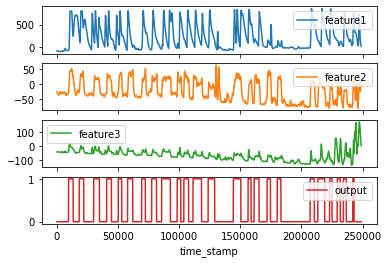

In [7]:
emg_df.set_index("time_stamp").plot(subplots=True) #ploting

In [8]:
df_input=emg_df[["feature1","feature2","feature3"]] #defining input of NN
Idf_input=emg_df1[["feature1","feature2","feature3"]]

In [9]:
df_input
Idf_input

,feature1,feature2,feature3
0,82,69,27
1,82,69,27
2,81,69,27
3,81,69,27
4,81,69,27
...,...,...,...
11649,117,143,183
11650,114,143,182
11651,112,143,181
11652,110,144,180


In [10]:
scaler=MinMaxScaler() 
scaled_data=scaler.fit_transform(df_input) #scaling data
Iscaled_data=scaler.fit_transform(Idf_input)

In [11]:
features=scaled_data 
output=emg_df["output"] #defining final inputs and output
Ifeatures=Iscaled_data
Ioutput=emg_df1["output"]

In [12]:
x_train,x_test,y_train,y_test= sklearn.model_selection.train_test_split(Ifeatures,Ioutput,test_size=0.3,random_state=123,shuffle=False)

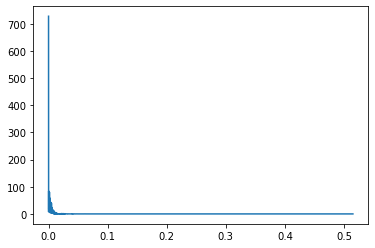

In [14]:
ff1=fft(If1(avgts(t)))
N=len(If1(avgts(t)))
ff1q=fftfreq(N,1/1.03)[:N//2]
plt.plot(ff1q,2.0/N*np.abs(ff1[0:N//2])) #ploting freq. spectrum of the transfromed data.

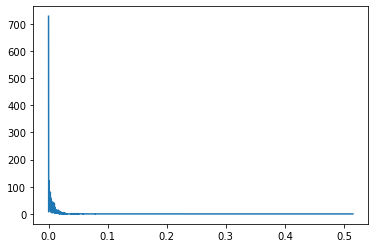

In [15]:
ff1=fft(f1)
N=len(f1)
ff1q=fftfreq(N,1/1.03)[:N//2]
plt.plot(ff1q,2.0/N*np.abs(ff1[0:N//2])) #plotting freq. spectrum of original data.

In [16]:
import pandas as pd

# Dictionary to store the header and values
my_dict = dict()

# Open the file
with open("1_raw_data.txt", 'r') as file_object: 

    # Read the content
    content = file_object.readlines() 

    # For every row
    d=[]
    for row in content:
        y=[]
        for i in row.split("\t"):
            y.append(i)
        d.append(y)
# getting from online source
            
  

In [17]:
def datagenerator(d): #function to create data into proper list of lists
    y=[]
    for i in d[1:]:
        t=[]
        for j in i:
            t.append(float(j))
        y.append(t)
    return y   
            

In [18]:
finaldata=np.array(datagenerator(d)) #getting data

In [19]:
dataout=[]
for i in finaldata[:,-1]:
    fx=[0,0,0,0,0,0,0]
    fx[int(i)]=1
    dataout.append(fx)
dataout=np.array(dataout) # getting input in proper format

In [20]:
emg_data = pd.DataFrame() #creating pd dataframe

In [23]:
emg_data['time_stamp']=finaldata[:,0]
emg_data['ch 1']=finaldata[:,1]
emg_data['ch 2']=finaldata[:,2]
emg_data['ch 3']=finaldata[:,3]
emg_data['ch 4']=finaldata[:,4]
emg_data['ch 5']=finaldata[:,5]
emg_data['ch 6']=finaldata[:,6]
emg_data['ch 7']=finaldata[:,7]
emg_data['ch 8']=finaldata[:,8]
emg_data['out 1']=dataout[:,0]
emg_data['out 2']=dataout[:,1]
emg_data['out 3']=dataout[:,2]
emg_data['out 4']=dataout[:,3]
emg_data['out 5']=dataout[:,4]
emg_data['out 6']=dataout[:,5]
emg_data['out 7']=dataout[:,6]


array([<AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>,
       <AxesSubplot:xlabel='time_stamp'>], dtype=object)

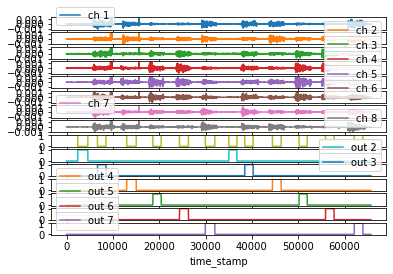

In [24]:
emg_data.set_index("time_stamp").plot(subplots=True) #plotting

In [25]:
modellogistic=tf.keras.Sequential() #creating a model to train data
modellogistic.add(tf.keras.layers.Dense(32,input_dim=3))
modellogistic.add(tf.keras.layers.Dense(64,activation='relu'))
modellogistic.add(tf.keras.layers.Dense(64,activation='relu'))
modellogistic.add(tf.keras.layers.Dense(128,activation='relu'))
modellogistic.add(tf.keras.layers.Dense(128,activation='relu'))
modellogistic.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [26]:
modellogistic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 31,361
Trainable params: 31,361
Non-traina

In [27]:
xl_train,xl_test,yl_train,yl_test= sklearn.model_selection.train_test_split(features,output,test_size=0.30,random_state=123,shuffle=False) #spliting data

In [28]:
modellogistic.compile(loss='binary_crossentropy',optimizer="rmsprop",metrics=["accuracy"]) #compiling 

In [33]:
modellogistic.fit(xl_train,yl_train,epochs=500) #training model

Epoch 1/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1393 - accuracy: 0.9586
Epoch 2/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1435 - accuracy: 0.9574
Epoch 3/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1775 - accuracy: 0.9595
Epoch 4/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1483 - accuracy: 0.9585
Epoch 5/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1290 - accuracy: 0.9570
Epoch 6/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1436 - accuracy: 0.9600
Epoch 7/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1500 - accuracy: 0.9562
Epoch 8/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1749 - accuracy: 0.9583
Epoch 9/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1417 - accuracy: 0.9548
Epoch 10/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1346 - accura

510/510 [==============================] - 1s 1ms/step - loss: 0.1403 - accuracy: 0.9573
Epoch 82/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1378 - accuracy: 0.9592
Epoch 83/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1389 - accuracy: 0.9565
Epoch 84/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1847 - accuracy: 0.9603
Epoch 85/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1428 - accuracy: 0.9565
Epoch 86/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1356 - accuracy: 0.9566
Epoch 87/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1373 - accuracy: 0.9562
Epoch 88/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1716 - accuracy: 0.9549
Epoch 89/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1500 - accuracy: 0.9562
Epoch 90/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1534 - accuracy: 

510/510 [==============================] - 1s 1ms/step - loss: 0.1837 - accuracy: 0.9557
Epoch 161/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1548 - accuracy: 0.9570
Epoch 162/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1558 - accuracy: 0.9584
Epoch 163/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1420 - accuracy: 0.9551
Epoch 164/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1729 - accuracy: 0.9568
Epoch 165/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1457 - accuracy: 0.9553
Epoch 166/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1450 - accuracy: 0.9556
Epoch 167/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1562 - accuracy: 0.9572
Epoch 168/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1557 - accuracy: 0.9557
Epoch 169/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1842 - a

510/510 [==============================] - 1s 1ms/step - loss: 0.1885 - accuracy: 0.9570
Epoch 240/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1582 - accuracy: 0.9561
Epoch 241/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1682 - accuracy: 0.9559
Epoch 242/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1737 - accuracy: 0.9564
Epoch 243/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1604 - accuracy: 0.9562
Epoch 244/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1664 - accuracy: 0.9543
Epoch 245/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1759 - accuracy: 0.9554
Epoch 246/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2120 - accuracy: 0.9538
Epoch 247/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1598 - accuracy: 0.9564
Epoch 248/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1699 - a

510/510 [==============================] - 1s 1ms/step - loss: 0.1918 - accuracy: 0.9529
Epoch 319/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2126 - accuracy: 0.9521
Epoch 320/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1737 - accuracy: 0.9517
Epoch 321/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1811 - accuracy: 0.9518
Epoch 322/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1971 - accuracy: 0.9520
Epoch 323/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1471 - accuracy: 0.9555
Epoch 324/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1835 - accuracy: 0.9546
Epoch 325/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1846 - accuracy: 0.9526
Epoch 326/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2135 - accuracy: 0.9528
Epoch 327/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1772 - a

510/510 [==============================] - 1s 1ms/step - loss: 0.1966 - accuracy: 0.9515
Epoch 398/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2127 - accuracy: 0.9507
Epoch 399/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2296 - accuracy: 0.9465
Epoch 400/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1698 - accuracy: 0.9500
Epoch 401/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1966 - accuracy: 0.9532
Epoch 402/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1761 - accuracy: 0.9495
Epoch 403/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2930 - accuracy: 0.9506
Epoch 404/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2331 - accuracy: 0.9535
Epoch 405/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2508 - accuracy: 0.9520
Epoch 406/500
510/510 [==============================] - 1s 1ms/step - loss: 0.3090 - a

510/510 [==============================] - 1s 1ms/step - loss: 0.1858 - accuracy: 0.9494
Epoch 477/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1773 - accuracy: 0.9516
Epoch 478/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2988 - accuracy: 0.9490
Epoch 479/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2249 - accuracy: 0.9483
Epoch 480/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1683 - accuracy: 0.9506
Epoch 481/500
510/510 [==============================] - 1s 1ms/step - loss: 0.1804 - accuracy: 0.9477
Epoch 482/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2562 - accuracy: 0.9491
Epoch 483/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2030 - accuracy: 0.9494
Epoch 484/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2554 - accuracy: 0.9471
Epoch 485/500
510/510 [==============================] - 1s 1ms/step - loss: 0.2143 - a

In [40]:
modellogistic.save("Trained_model 01") #saving model

In [41]:
modeltest = tf.keras.models.load_model('Trained_model 01') #getting model

In [47]:
modeltest.evaluate(x_test,y_test)[1] #evaluation.

110/110 [==============================] - 0s 888us/step - loss: 737.2693 - accuracy: 0.8719


0.8718901872634888